In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns

In [2]:
!pwd

/home/user/energygpt/timesfm_cpu


In [ ]:
datasets = ['Prayas']

In [4]:
def load_results(datasets):
    results = []
    for dataset in datasets:
        print(dataset)
        df = pd.read_csv(f'/home/user/energygpt/timesfm_cpu/results/{dataset}/results_combined.csv')
        df.insert(0, 'dataset', dataset)    
        print(df.shape)
        results.append(df)            
    results_df = pd.concat(results)
    return results_df

In [5]:
res = load_results(datasets)
print(res.shape)

Prayas
(116, 13)
(116, 13)


In [7]:
res

,dataset,Unnamed: 0,building_name,mae,mape,mse,rmse,msle,rmsle,nrmse,nrmse_eve,sMAPE,filename
0,Prayas,0,H001,0.060564,5.209812e+13,0.007422,0.086151,0.005039,0.070985,0.773316,0.907498,1.000000,eMARC-1H.csv
1,Prayas,0,H002,0.031255,4.338843e+12,0.003679,0.060654,0.002465,0.049650,0.780878,0.881119,1.000000,eMARC-1H.csv
2,Prayas,0,H003,0.039277,6.269577e+12,0.004200,0.064809,0.002849,0.053375,0.652322,1.397320,1.000000,eMARC-1H.csv
3,Prayas,0,H004,0.051825,6.073714e+13,0.008177,0.090426,0.004914,0.070099,1.128553,0.853418,1.000000,eMARC-1H.csv
4,Prayas,0,H005,0.043843,6.951547e+12,0.004793,0.069233,0.003067,0.055382,0.483671,0.727745,1.000000,eMARC-1H.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Prayas,0,H139,0.036121,8.590100e+13,0.003762,0.061333,0.002387,0.048860,1.300619,0.853805,1.000000,eMARC-1H.csv
112,Prayas,0,H140,0.043637,9.442788e+13,0.003826,0.061856,0.002848,0.053363,1.082262,0.748538,1.000000,eMARC-1H.csv
113,Prayas,0,H141,0.045940,1.023322e+14,0.005015,0.070820,0.003559,0.059658,1.242598,0.695452,1.000000,eMARC-1H.csv
114,Prayas,0,H142,0.049671,8.385947e+13,0.007426,0.086173,0.004133,0.064292,0.865028,0.610545,0.673966,eMARC-1H.csv


In [6]:
filename = '/home/user/New_Buildings_Datasets/Prayas/raw/eMAR daily consumption(in).csv'
df_daily = pd.read_csv(filename)
df_daily

,Region,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh)
0,Pune city,With Air Conditioners,H002,appliance,D0003,12/22/2019,1.039917
1,Pune city,With Air Conditioners,H002,appliance,D0003,12/23/2019,0.930054
2,Pune city,With Air Conditioners,H002,appliance,D0003,12/24/2019,1.059936
3,Pune city,With Air Conditioners,H002,appliance,D0003,12/25/2019,1.270020
4,Pune city,With Air Conditioners,H002,appliance,D0003,12/26/2019,1.010010
...,...,...,...,...,...,...,...
111275,Pune city,Water Heaters but no AC,H016,appliance,D0031,3/17/2020,1.300000
111276,Pune city,Water Heaters but no AC,H016,appliance,D0031,3/18/2020,1.600000
111277,Pune city,Water Heaters but no AC,H016,appliance,D0031,3/19/2020,1.500000
111278,Pune city,Water Heaters but no AC,H016,appliance,D0031,3/20/2020,1.600000


In [10]:
df_daily[df_daily.household_id == 'H002']['Region']

0        Pune city
1        Pune city
2        Pune city
3        Pune city
4        Pune city
           ...    
67393    Pune city
67394    Pune city
67395    Pune city
67396    Pune city
67397    Pune city
Name: Region, Length: 1815, dtype: object

In [12]:
city = {}
for each in res.building_name.unique():
    city[each] = df_daily[df_daily.household_id == each]['Region'].values[0]
city 

{'H001': 'Pune city',
 'H002': 'Pune city',
 'H003': 'Pune city',
 'H004': 'Pune city',
 'H005': 'Pune city',
 'H006': 'Pune city',
 'H007': 'Pune city',
 'H008': 'Pune city',
 'H009': 'Pune city',
 'H010': 'Pune city',
 'H011': 'Pune city',
 'H012': 'Pune city',
 'H013': 'Pune city',
 'H014': 'Pune city',
 'H015': 'Pune city',
 'H016': 'Pune city',
 'H017': 'Pune city',
 'H018': 'Pune city',
 'H019': 'Pune city',
 'H020': 'Pune city',
 'H021': 'Pune city',
 'H022': 'Pune city',
 'H023': 'Pune city',
 'H024': 'Pune city',
 'H025': 'Pune city',
 'H026': 'Pune city',
 'H027': 'Pune city',
 'H028': 'Pune city',
 'H029': 'Pune city',
 'H030': 'Pune city',
 'H031': 'Pune city',
 'H032': 'Pune city',
 'H033': 'Pune city',
 'H034': 'Pune city',
 'H036': 'Pune city',
 'H037': 'Pune city',
 'H038': 'Pune city',
 'H040': 'Pune city',
 'H041': 'Pune city',
 'H042': 'Pune city',
 'H043': 'Pune city',
 'H044': 'Pune city',
 'H046': 'Gonda',
 'H048': 'Gonda',
 'H052': 'Kanpur rural',
 'H057': 'Kanpu

In [14]:
def ind(row):
    return city[row]

In [15]:
res['region'] = res['building_name'].apply(ind)
res

,dataset,Unnamed: 0,building_name,mae,mape,mse,rmse,msle,rmsle,nrmse,nrmse_eve,sMAPE,filename,region
0,Prayas,0,H001,0.060564,5.209812e+13,0.007422,0.086151,0.005039,0.070985,0.773316,0.907498,1.000000,eMARC-1H.csv,Pune city
1,Prayas,0,H002,0.031255,4.338843e+12,0.003679,0.060654,0.002465,0.049650,0.780878,0.881119,1.000000,eMARC-1H.csv,Pune city
2,Prayas,0,H003,0.039277,6.269577e+12,0.004200,0.064809,0.002849,0.053375,0.652322,1.397320,1.000000,eMARC-1H.csv,Pune city
3,Prayas,0,H004,0.051825,6.073714e+13,0.008177,0.090426,0.004914,0.070099,1.128553,0.853418,1.000000,eMARC-1H.csv,Pune city
4,Prayas,0,H005,0.043843,6.951547e+12,0.004793,0.069233,0.003067,0.055382,0.483671,0.727745,1.000000,eMARC-1H.csv,Pune city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Prayas,0,H139,0.036121,8.590100e+13,0.003762,0.061333,0.002387,0.048860,1.300619,0.853805,1.000000,eMARC-1H.csv,Aurangabad
112,Prayas,0,H140,0.043637,9.442788e+13,0.003826,0.061856,0.002848,0.053363,1.082262,0.748538,1.000000,eMARC-1H.csv,Aurangabad
113,Prayas,0,H141,0.045940,1.023322e+14,0.005015,0.070820,0.003559,0.059658,1.242598,0.695452,1.000000,eMARC-1H.csv,Aurangabad
114,Prayas,0,H142,0.049671,8.385947e+13,0.007426,0.086173,0.004133,0.064292,0.865028,0.610545,0.673966,eMARC-1H.csv,Aurangabad


In [9]:
cols = ['sMAPE', 'nrmse', 'nrmse_eve']
res_agg1 = res[cols].agg( {'sMAPE': ['mean', 'std', 'median'],
                            'nrmse': ['mean', 'std', 'median'],
                            'nrmse_eve':['mean', 'std', 'median'] })
res_agg1

/home/user/miniconda3/envs/tfm_env/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sMAPE,nrmse,nrmse_eve
mean,0.715879,inf,1.105606
std,0.350208,NaN,0.479859
median,1.000000,0.791221,1.011425


In [10]:
cols = [ 'nrmse']
res_agg1 = res[cols].agg( {'nrmse': ['mean', 'std', 'median']})
res_agg1*100

/home/user/miniconda3/envs/tfm_env/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,nrmse
mean,inf
std,NaN
median,79.122051


In [14]:
cols = ['dataset', 'nrmse', 'nrmse_eve', 'rmse']

res_agg1 = res[cols].groupby(['dataset']).agg( { #'sMAPE': ['mean', 'std', 'median'],
                                                      'rmse': ['mean', 'std', 'median'],
                                                      'nrmse': ['mean', 'std', 'median'],
                                             'nrmse_eve': ['mean', 'std', 'median'] }
                                             )
res_agg1.mul(100).round(2).to_csv('./results/residential.csv')
res_agg1.mul(100).round(2).to_latex('./results/residential.tex')
res_agg1.mul(100).round(2)

rmse               nrmse               nrmse_eve               
            mean   std median   mean    std median      mean    std  median
dataset                                                                    
LCL         9.78  2.37   9.80  90.67  31.94  86.74    158.78  70.02  146.43
SMART       9.86  2.75   9.22  75.09  14.57  73.92    123.46  27.33  128.34
SMART-star  9.05  1.71   9.23  64.27  12.46  62.71     86.97  23.86   84.25

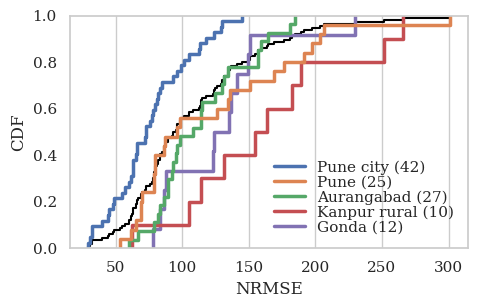

In [20]:
def con(row, ty):
    for i in ty:
        if row == i:
            op = f'{row} ({ty[row]})'
            return op

# sns.set()  # crazy big
sns.set_theme(style="whitegrid", font_scale=1.0)

date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.figure(figsize=(5, 3.3))
fig, ax = plt.subplots()


copy_df = res['nrmse'].reset_index()
all_df = pd.DataFrame(copy_df['nrmse'] * 100)
#assembly_df
all_df['cdf'] = all_df.rank(method = 'average', pct = True)
ax_c = seaborn.ecdfplot(data=all_df.sort_values('nrmse'), x="nrmse", ax=ax, color='black', lw=1.5)
# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color = 'black')
# median = all_df.sort_values('NRMSE').quantile(0.5)
# #plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))

copy_df = res.reset_index()
copy_df['nrmse'] = copy_df['nrmse'] * 100
# copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
# copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])
# copy_df = copy_df[copy_df.building_type.isin(b_types)]
copy_df.region = copy_df.region.str.capitalize()
ty = dict(copy_df.region.value_counts())
copy_df['region'] = copy_df.region.apply(con, ty = ty)

copy_df = copy_df.sort_values('nrmse')


ax_s = seaborn.ecdfplot(data=copy_df, x="nrmse", hue='region', ax=ax, lw=2.5)
# ax_s.set_xscale('log')
# ax_s.set_xlim(0, 200)
# sns.move_legend(ax, "lower right", labelspacing=0.2, title='')
sns.move_legend(ax_s, "lower right", title='', labelspacing=0.05, frameon=False)
# sns.move_legend(ax_s, "lower right", title='', labelspacing=0.2, bbox_to_anchor=(1.7, 0.2))
# box = ax_s.get_position()
# print(box)
# ax_s.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# # Put a legend to the right side
# ax_s.legend(loc='upper right', bbox_to_anchor=(1.25, 0.5), ncol=1)

# ax_s.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0, title='Types')
plt.title(label='')

plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
os.makedirs('Plots', exist_ok=True)
plt.savefig("Plots/TimesFM-prayas-error-building-region-cdfplot.pdf", bbox_inches='tight')
plt.show()